In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [6]:
%store -r  final_merge
%store -r order_arriv

In [9]:
total_delivery = final_merge.copy()

In [10]:
total_delivery.columns

Index(['order_id', 'order_date', 'state', 'region', 'ship_mode',
       'ready_to_ship_date', 'pickup_date', 'arrival_scan_date',
       'total_deliv'],
      dtype='object')

In [11]:
total_delivery = total_delivery.filter(items=['pickup_date','arrival_scan_date'])
total_delivery.head(2)

,pickup_date,arrival_scan_date
0,NaT,NaT
1,NaT,NaT


In [12]:
total_delivery.shape

(5010, 2)

In [13]:
total_delivery.isnull().sum()

pickup_date          2007
arrival_scan_date    4677
dtype: int64

In [16]:
total_delivery = total_delivery.dropna()

In [19]:
total_delivery['total_deliv']=total_delivery['arrival_scan_date'] - total_delivery['pickup_date']
total_delivery.head()

,pickup_date,arrival_scan_date,total_deliv
1699,2019-11-27,2019-12-02,5 days
1700,2019-12-04,2019-12-09,5 days
1703,2019-09-25,2019-09-30,5 days
1706,2019-12-04,2019-12-09,5 days
1707,2019-05-22,2019-05-28,6 days


In [27]:
total_delivery.describe()

,pickup_date,arrival_scan_date,total_deliv
count,333,333,333
mean,2019-10-10 05:07:01.621621504,2019-10-14 19:36:12.972973056,4 days 14:29:11.351351351
min,2019-04-29 00:00:00,2019-05-03 00:00:00,1 days 00:00:00
25%,2019-09-04 00:00:00,2019-09-09 00:00:00,4 days 00:00:00
50%,2019-10-16 00:00:00,2019-10-21 00:00:00,5 days 00:00:00
75%,2019-12-11 00:00:00,2019-12-16 00:00:00,5 days 00:00:00
max,2020-05-13 00:00:00,2020-05-15 00:00:00,7 days 00:00:00
std,NaN,NaN,1 days 04:47:16.148329809


In [29]:
total_delivery['total_deliv'].value_counts()

total_deliv
5 days    179
3 days     45
4 days     44
6 days     25
7 days     20
2 days     17
1 days      3
Name: count, dtype: int64

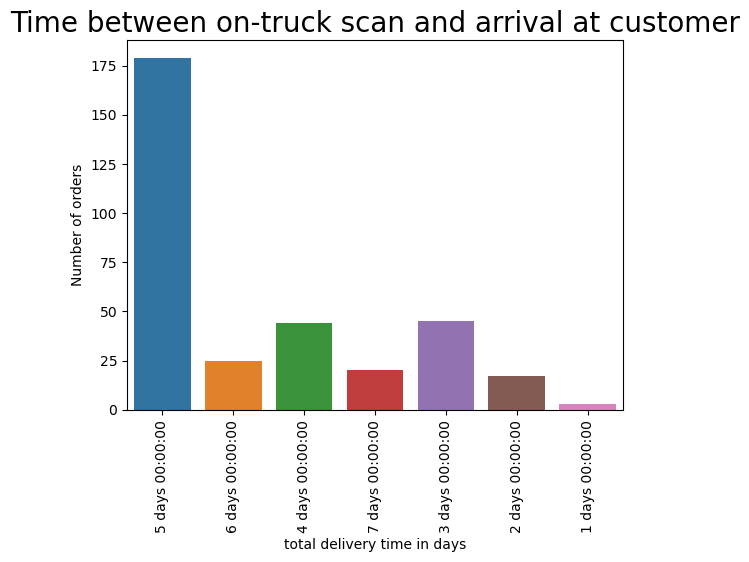

In [26]:
#day_order = ["1 day", "2 days", "3 days", "4 days", "5 days", "6 days","7 days"]
f1 = sns.countplot(x=total_delivery['total_deliv']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set_xlabel("total delivery time in days", fontsize = 10)
#f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_ylabel("Number of orders", fontsize = 10); # set label for y-axis
f1.set_title('Time between on-truck scan and arrival at customer', fontsize=20);